[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fidanfatih/Statistics_with_Python/blob/main/Statistics_Assignment_2.ipynb#scrollTo=tsgvFAszXVV2)

## Descriptive Statistics

 Import **NumPy**, **SciPy**, and **Pandas**

In [36]:
import numpy as np
from scipy import stats
import pandas as pd

 Randomly generate 1,000 samples from the normal distribution using `np.random.normal()`(mean = 100, standard deviation = 15)

In [37]:
mu, sigma = 100, 15
samples = np.random.normal(mu, sigma, 1000)

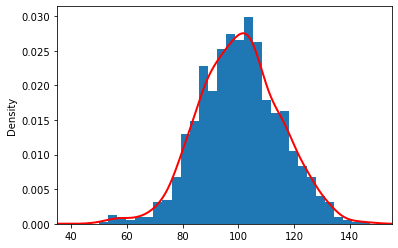

In [38]:
# with pandas
pd.Series(samples).plot.hist(bins=30,density=True,xlim=[35,155]) # histogram
pd.Series(samples).plot.kde(linewidth=2, color='r'); # line graph

Probability density function
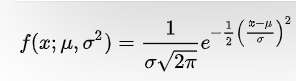

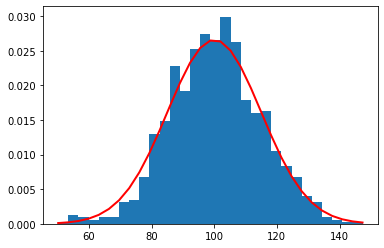

In [39]:
# Alternative with matplotlib
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 
         1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Compute the **mean**, **median**, and **mode**

In [40]:
mean = np.mean(samples)
median = np.median(samples)
mode = stats.mode(samples)[0][0]

print(f"""mean\t: {mean}
median\t: {median}
mode\t: {mode}""") 

mean	: 100.43824746569756
median	: 100.51470072492646
mode	: 50.14583535480217


Compute the **min**, **max**, **Q1**, **Q3**, and **interquartile range**

In [41]:
min = np.min(samples)
max = np.max(samples)
q1 = np.percentile(samples,25)
q3 = np.percentile(samples,75)
iqr = q3 - q1

print(f"""min\t: {min}
max\t: {max}
Q1\t: {q1}
Q3\t: {q3}
IQR\t: {iqr}""") 

min	: 50.14583535480217
max	: 147.33674517494114
Q1	: 90.51935910881788
Q3	: 109.81237581878912
IQR	: 19.29301670997124


Compute the **variance** and **standard deviation**

In [42]:
variance = np.var(samples)
std_dev = np.std(samples)

print(f"""Variance: {variance}
S.Dev\t: {std_dev}""") 

Variance: 209.96823816353694
S.Dev	: 14.490280817276695


Compute the **skewness** and **kurtosis**

In [43]:
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"""Skewness: {skewness}
Kurtosis: {kurtosis}""") 

Skewness: -0.04024677862975813
Kurtosis: 0.164117751505656


## NumPy Correlation Calculation

Create an array x of integers between 10 (inclusive) and 20 (exclusive). Use `np.arange()`

In [44]:
x = np.arange(10,20,1)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Then use `np.array()` to create a second array y containing 10 arbitrary integers.

In [45]:
y = np.array(sorted(np.random.randint(0,1000,10)))
y

array([103, 123, 225, 228, 276, 419, 503, 568, 786, 887])

Once you have two arrays of the same length, you can compute the **correlation coefficient** between x and y

In [46]:
r = np.corrcoef(x,y)
r

array([[1.        , 0.97108629],
       [0.97108629, 1.        ]])

In [47]:
print(f"Correlation Coeff(r): {r[0][1]}")

Correlation Coeff(r): 0.9710862885073845


## Pandas Correlation Calculation

Run the code below

In [48]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

Call the relevant method  to calculate Pearson's r correlation.

In [49]:
# Correlation with pandas
print(f"Pearson Correlation Coeff(r): {x.corr(y)}")

# Correlation with numpy
print(f"Pearson Correlation Coeff(r): {np.corrcoef(x,y)[0][1]}")

# Correlation with scipy
print(f"Pearson Correlation Coeff(r): {stats.pearsonr(x,y)[0]}")

Pearson Correlation Coeff(r): 0.7586402890911867
Pearson Correlation Coeff(r): 0.7586402890911867
Pearson Correlation Coeff(r): 0.7586402890911869


OPTIONAL. Call the relevant method to calculate Spearman's rho correlation.

In [50]:
# Correlation with pandas
rho = x.corr(y, method='spearman')
rho

0.9757575757575757

In [51]:
# Correlation with scipy
rho = stats.spearmanr(x,y)
rho[0]

0.9757575757575757

## Seaborn Dataset Tips

Import Seaborn Library

In [52]:
import seaborn as sns

Load "tips" dataset from Seaborn

In [53]:
tips = sns.load_dataset("tips")

Generate descriptive statistics include those that summarize the central tendency, dispersion

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [66]:
tips.describe(include = 'category').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [68]:
tips.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


In [58]:
# Alternative Solution
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Range = Max - Min
    Mean= df.mean()
    Median = df.quantile(0.5)
    Mode = df.apply(lambda x: stats.mode(x)).T[0]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Variance = df.var()
    Std= df.std()
    Kurtosis = df.kurtosis()
    Skewness = df.skew()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max','Range','Mean','Mode','Q1','Median','Q3','IQR','Variance','Std','Kurtosis','Skewness']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max, Range, Mean, Mode, Q1, Median, Q3, IQR, Variance, Std, Kurtosis, Skewness,
                        ], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(tips).sort_values(by='Nulls', ascending=False).T)

Data shape: (244, 7)
___________________________
Data Types:
float64     2
int64       1
category    1
category    1
category    1
category    1
Name: Types, dtype: int64
___________________________


,day,sex,size,smoker,time,tip,total_bill
Types,category,category,int64,category,category,float64,float64
Counts,244,244,244,244,244,244,244
Uniques,4,2,6,2,2,123,229
Nulls,0,0,0,0,0,0,0
Min,NaN,NaN,1.0,NaN,NaN,1.0,3.07
Max,NaN,NaN,6.0,NaN,NaN,10.0,50.81
Range,NaN,NaN,5.0,NaN,NaN,9.0,47.74
Mean,NaN,NaN,2.569672,NaN,NaN,2.998279,19.785943
Mode,[Sat],[Male],[2],[No],[Dinner],[2.0],[13.42]
Q1,NaN,NaN,2.0,NaN,NaN,2.0,13.3475


Call the relevant method to calculate pairwise Pearson's r correlation of columns

In [59]:
tips["total_bill"].corr(tips["tip"])

0.6757341092113641

In [60]:
tips["total_bill"].corr(tips["size"])

0.5983151309049022

In [61]:
tips["tip"].corr(tips["size"])

0.4892987752303577

In [62]:
tips.corr(method='pearson') 
# method:['pearson','kendall','spearman'], pearson is default

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


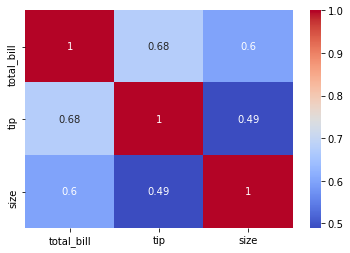

In [63]:
sns.heatmap(tips.corr(), cmap='coolwarm',annot=True); 